# Visualize real images

In [1]:
import os
import pandas as pd
from typing import List, Tuple

from PIL import Image

In [2]:
ANNOTATIONS_DIR = '/home/gregschuit/projects/data/annotations'

annotation_paths = {
    'Atelectasis': os.path.join(ANNOTATIONS_DIR, 'atelectasis_PA_train.txt'),
    'Lung Opacity': os.path.join(ANNOTATIONS_DIR, 'lung_opacity_PA_train.txt'),
    'Pleural Effusion': os.path.join(ANNOTATIONS_DIR, 'pleural_effusion_PA_train.txt'),
    'Enlarged Cardiac Silhouette': os.path.join(ANNOTATIONS_DIR, 'enlarged_cardiac_PA_train.txt'),
}

In [3]:
IMAGES_DIR = '/mnt/workspace/mimic-cxr-jpg/images-small/'


def load_annotations(name: str) -> pd.DataFrame:
    """Loads annotation file including paths to images corresponding to a given label."""
    df = pd.read_csv(annotation_paths[name], header=None, names=['path', 'label'], sep=' ')
    return df


def read_image(relative_path: str):
    """Shows an image given a relative path."""
    abs_path = os.path.join(IMAGES_DIR, relative_path)
    img = Image.open(abs_path)
    return img


def sample_negatives_and_positives(
    size: int,
    class_name: str
) -> Tuple[List[Image.Image], List[Image.Image]]:
    """Samples negative and positive images for a given class.
    
    Args:
        size: number of images to sample of each class (positive and negative)
        class_name: name of the class to sample. For example: "atelactasis",
        "lung opacity", etc.

    """
    annotations_df = load_annotations(class_name)

    positive_df = annotations_df[annotations_df['label'] == 1]
    negative_df = annotations_df[annotations_df['label'] == 0]

    negative_images = negative_df.sample(size)['path'].apply(read_image).tolist()
    positive_images = positive_df.sample(size)['path'].apply(read_image).tolist()

    return negative_images, positive_images


def show_grid(images: List[Image.Image]) -> Image.Image:
    """Creates a new image that contains a grid of images.
    
    Currently hardcoded for 256 x 256 and 3 columns in the grid.

    """
    w, h = 256, 256
    cols, rows = 3, len(images) // 3 + (len(images) % 3 > 0)
    grid = Image.new('RGB', size=(cols * w, rows * h))

    for i, img in enumerate(images):
        grid.paste(img, box=(i % cols * w, i // cols * h))

    return grid


## Lung opacity images

Images without Lung Opacity:


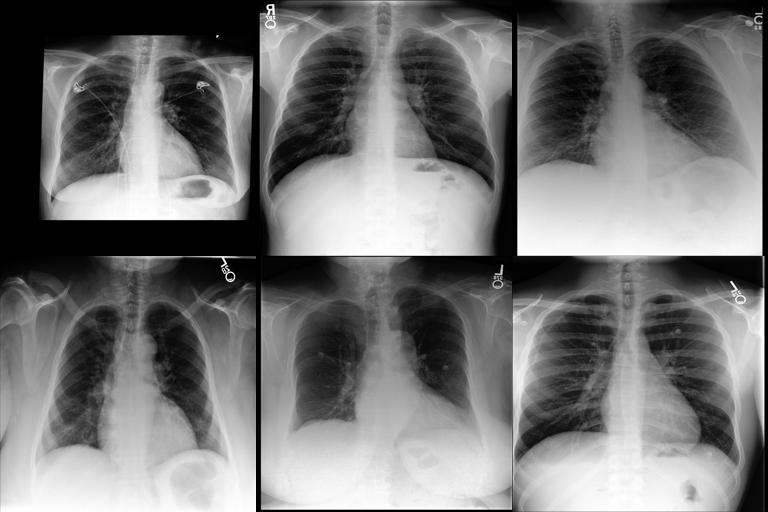

In [4]:
finding = 'Lung Opacity'

negative_images, positive_images = sample_negatives_and_positives(6, finding)

print(f'Images without {finding}:')
show_grid(negative_images)

Images with Lung Opacity:


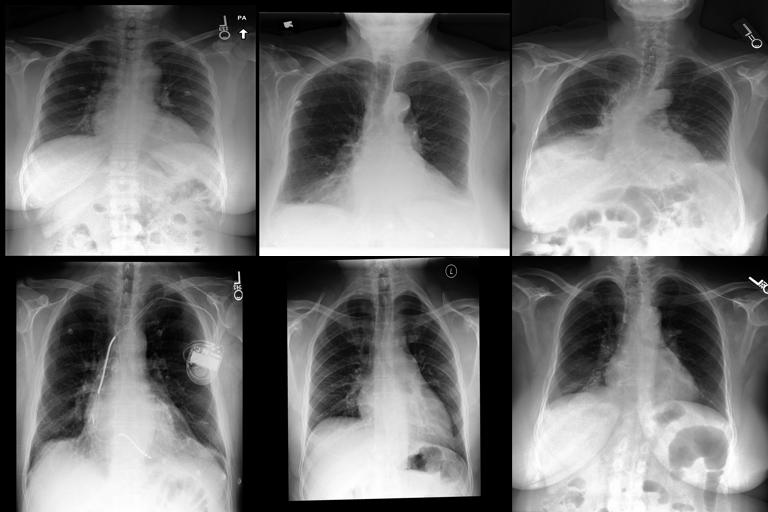

In [5]:
print(f'Images with {finding}:')
show_grid(positive_images)

## Enlarged Cardiac Silhouette

Images without Enlarged Cardiac Silhouette:


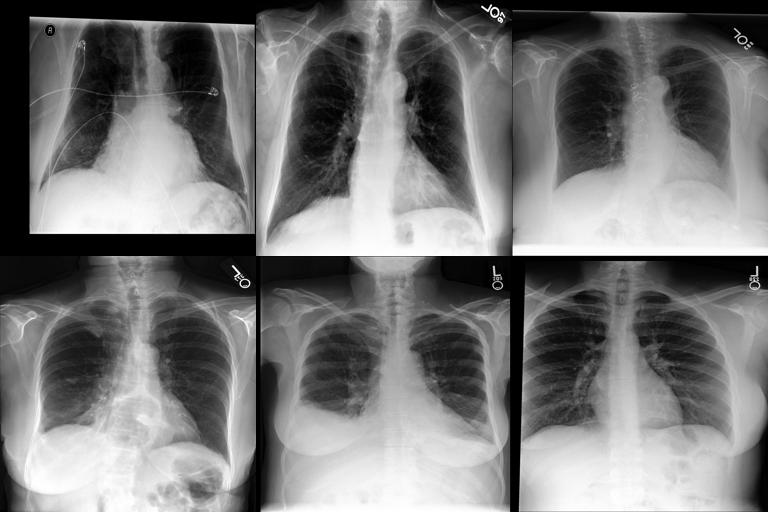

In [6]:
finding = 'Enlarged Cardiac Silhouette'

negative_images, positive_images = sample_negatives_and_positives(6, finding)

print(f'Images without {finding}:')
show_grid(negative_images)

Images with Enlarged Cardiac Silhouette:


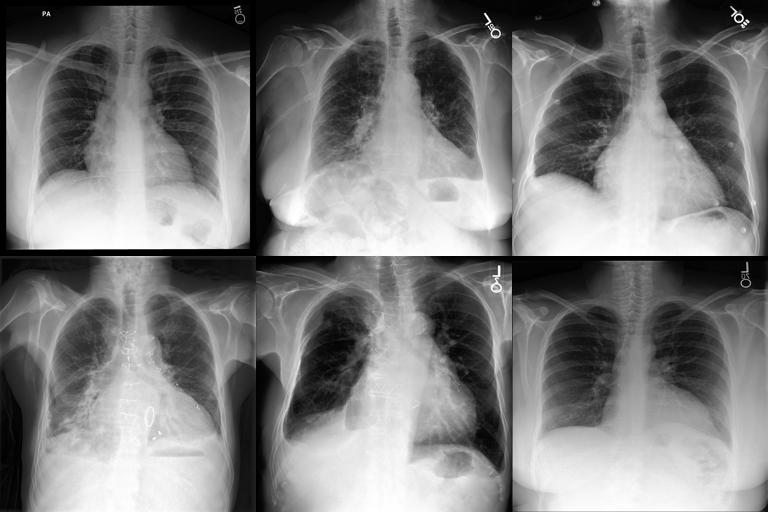

In [7]:
print(f'Images with {finding}:')
show_grid(positive_images)